<a href="https://colab.research.google.com/github/parthn369/DeepLearning-ANN/blob/main/MNIST_Hand_Written_Digit_Classification(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow.keras as tf
import matplotlib.pyplot as plt

In [ ]:
mnist = tf.datasets.mnist
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
xtrain.shape

(60000, 28, 28)

In [ ]:
ytrain.shape

(60000,)

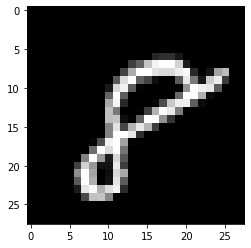

In [ ]:
plt.imshow(xtrain[59999],cmap="gray")
plt.show()

In [ ]:
ytrain[59999]

8

In [ ]:
### Create a neural network(Blank model)
model = tf.models.Sequential() #Blank empty model
model.add(tf.layers.Flatten()) #input layer
model.add(tf.layers.Dense(784,activation="relu")) #hidden layer
model.add(tf.layers.Dense(10,activation="softmax")) ##output layer
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics = ["accuracy"])


In [ ]:
### Scale the data
xtrain = xtrain/255
xtest = xtest/255

In [ ]:
## Train the model
model.fit(xtrain,ytrain,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1927 - accuracy: 0.9424
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0759 - accuracy: 0.9761
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0493 - accuracy: 0.9841
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0358 - accuracy: 0.9885
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0265 - accuracy: 0.9917
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0202 - accuracy: 0.9933
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0176 - accuracy: 0.9945
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0152 - accuracy: 0.9953
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0111 - accuracy: 0.9966
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.01

In [ ]:
ypred = model.predict(xtest)

In [ ]:
ytest[555]

4

In [ ]:
ypred[555]

array([2.9202140e-12, 1.2966486e-11, 1.1620568e-09, 1.7589601e-10,
       1.0000000e+00, 1.9413203e-15, 1.0833062e-14, 6.1661420e-10,
       2.2100522e-12, 2.6733833e-08], dtype=float32)

In [ ]:
import numpy as np
np.argmax(ypred[555])

4

In [ ]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.0900 - accuracy: 0.9811


[0.08999510854482651, 0.9811000227928162]

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,np.argmax(ypred,axis=1))
cm

array([[ 968,    1,    3,    0,    2,    0,    2,    1,    2,    1],
       [   0, 1129,    1,    1,    0,    1,    3,    0,    0,    0],
       [   1,    1, 1013,    6,    2,    0,    1,    4,    3,    1],
       [   2,    0,    4,  990,    0,    2,    0,    5,    5,    2],
       [   1,    0,    7,    0,  967,    0,    3,    0,    0,    4],
       [   2,    0,    0,    8,    1,  862,   12,    0,    6,    1],
       [   1,    2,    1,    1,    2,    1,  949,    0,    1,    0],
       [   1,    2,   10,    1,    1,    0,    0, 1005,    2,    6],
       [   5,    0,    4,    2,    3,    1,    6,    2,  946,    5],
       [   3,    3,    1,    3,    8,    3,    0,    3,    3,  982]])

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(ytest,np.argmax(ypred,axis=1))
acc

0.9811

In [ ]:
model.save("ann.h5")